Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.7069 - accuracy: 0.1000 - val_loss: 0.6883 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 86ms/step - loss: 0.6751 - accuracy: 0.8000 - val_loss: 0.6791 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 112ms/step - loss: 0.6599 - accuracy: 0.8000 - val_loss: 0.6698 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 90ms/step - loss: 0.6323 - accuracy: 0.8000 - val_loss: 0.6603 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 0s 124ms/step - loss: 0.6295 - accuracy: 0.8000 - val_loss: 0.6523 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 0s 109ms/step - loss: 0.6141 - accuracy: 0.8000 - val_loss: 0.6452 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 93ms/step - loss: 0.5658 - accuracy: 0.8000 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 8/20
1/1 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


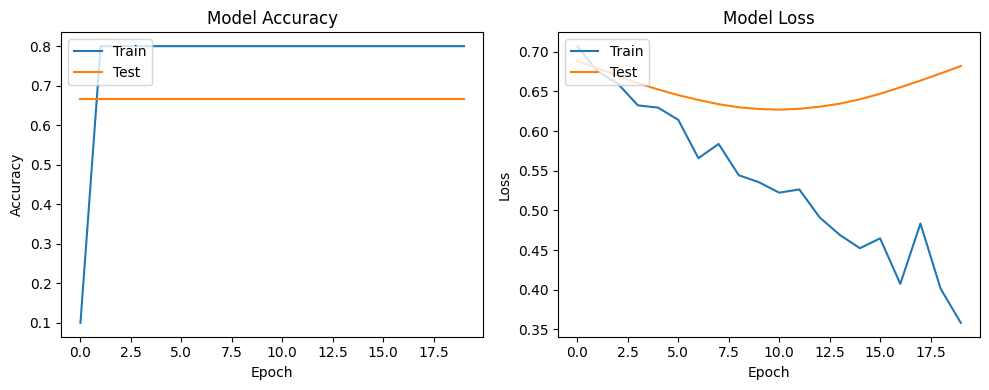

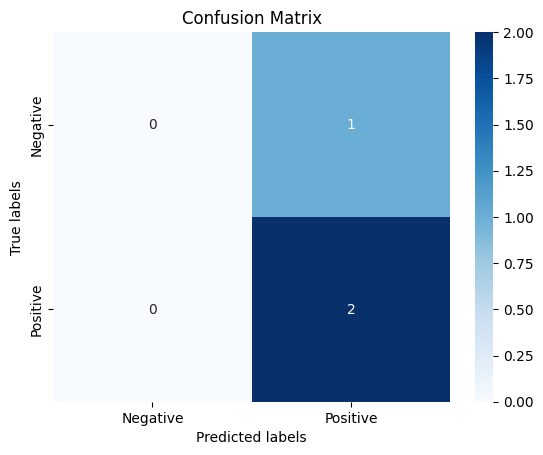

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data obat-obatan
positive_texts = [
    "Obat ini sangat efektif untuk meredakan sakit kepala.",
    "Saya merasa jauh lebih baik setelah mengonsumsi obat ini.",
    "Dosis obat ini pas untuk saya dan aman digunakan.",
    "Obat ini sangat membantu untuk mengatasi alergi saya.",
    "Saya merasa lebih sehat setelah mengonsumsi obat ini.",
    "Efek samping obat ini sangat minim dan tidak mengganggu.",
    "Obat ini direkomendasikan oleh dokter dan terbukti ampuh.",
    "Penggunaan obat ini mudah dan praktis.",
    "Obat ini membantu mempercepat proses penyembuhan saya.",
    "Saya merasa puas dengan kualitas obat ini."
]

negative_texts = [
    "Obat ini tidak efektif sama sekali, saya masih merasakan sakitnya.",
    "Saya tidak melihat perubahan setelah mengonsumsi obat ini.",
    "Efek samping obat ini sangat mengganggu kesehatan saya.",

]

texts = positive_texts + negative_texts
labels = np.array([1] * len(positive_texts) + [0] * len(negative_texts))

# Tokenisasi teks
max_words = 2000  # Jumlah kata maksimum yang akan dijadikan token
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequence agar memiliki panjang yang sama
maxlen = 50  # Panjang sequence
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Membangun model CNN dengan lapisan tambahan dan dropout
embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Conv1D(filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
batch_size = 32
epochs = 20  # Jumlah epoch
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot loss dan accuracy
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Heatmap confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
